In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# Data Extraction

In [2]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

# Exploratory Data Analysis (EDA)

In [3]:
# Checking the shape of the data
df.shape

(1000, 8)

In [4]:
# Checking the column's names
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
# Taking a look of general data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# Looking out for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Checking the data of data
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
# Taking a look at the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


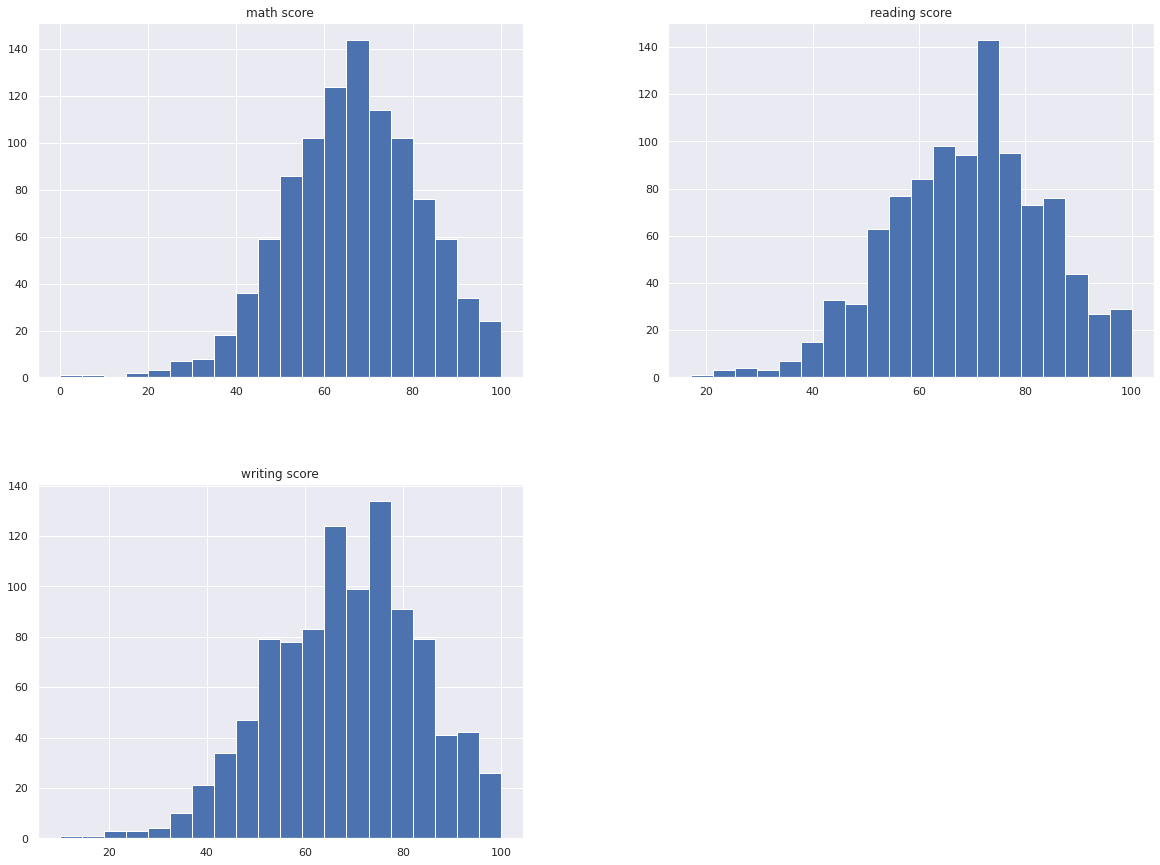

In [9]:
# Plotting a histogram of the numerical variables 
sns.set()
df.hist(bins=20, figsize=(20,15));

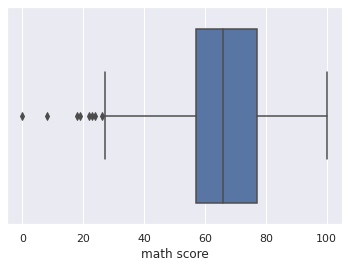

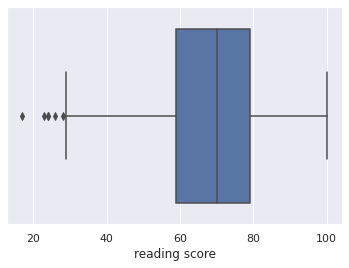

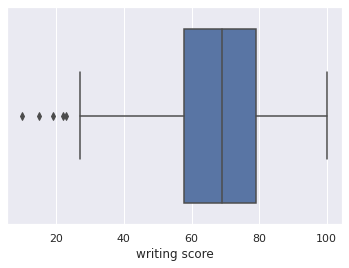

In [10]:
# Checking the boxplot looking for outliers
sns.boxplot(  x= df['math score']   , data=df,  orient='h' , )
plt.show()
sns.boxplot(  x= df['reading score'], data=df,  orient='h' , )
plt.show()
sns.boxplot(  x= df['writing score'], data=df,  orient='h' , )
plt.show()

We notice that exist some outliers but analyzing the dataset it's possible reach the conclusion we haven't any reason to discard these outliers.

**Gender Distribution**

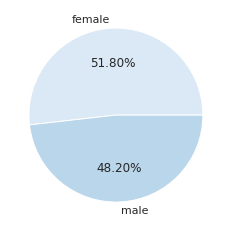

In [11]:
colors = sns.color_palette('Blues')
_ = plt.pie(df.gender.value_counts(),labels=df.gender.value_counts().index,autopct='%1.2f%%',colors=colors)

**Race Distribution**

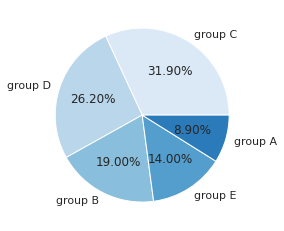

In [12]:
colors = sns.color_palette('Blues')
_ = plt.pie(df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,autopct='%1.2f%%',colors=colors)

**Parental level of education**

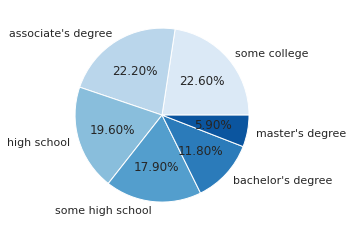

In [13]:
colors = sns.color_palette('Blues')
_ = plt.pie(df['parental level of education'].value_counts(),labels=df['parental level of education'].value_counts().index,autopct='%1.2f%%',colors=colors)

**Test preparation course**

none         642
completed    358
Name: test preparation course, dtype: int64


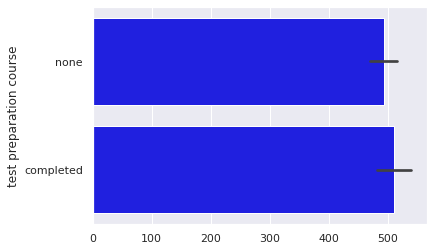

In [14]:
print(df['test preparation course'].value_counts())
_ = sns.barplot(x=df['test preparation course'].index,y=df['test preparation course'],data=df,color='blue')

**Lunch**

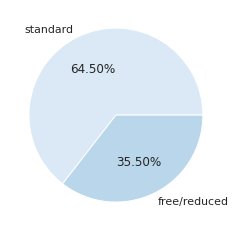

In [15]:
colors = sns.color_palette('Blues')
_ = plt.pie(df.lunch.value_counts(),labels=df.lunch.value_counts().index,autopct='%1.2f%%',colors=colors)

**Comparison between the test preparation course and the average result**

In [16]:
df['average score'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [17]:
# The average score to the person that haven't any test preparation course
average_none = df[df['test preparation course'] == 'none']['average score']

# The average score to the person that have completed the test preparation course
average_completed = df[df['test preparation course'] == 'none']['average score']

averages = pd.DataFrame({'average_none':[average_none.mean()],'average_completed':[average_completed.mean()]})

# Transforming in percentual values
x = averages['average_none'] / (averages['average_none'] + averages['average_completed']) 
y = averages['average_completed'] / (averages['average_none'] + averages['average_completed']) 
averages['average_none']      = x[0]
averages['average_completed'] = y[0]

difference = (x[0]-y[0])
print("Difference between Average Score of Students that had test preparation course and the students that haven't it: ",difference)


Difference between Average Score of Students that had test preparation course and the students that haven't it:  0.0


We see that wasn't any difference at the Average Score, now let's take a look at the histogram plot aiming check the Average Score distribution for both cases (test preparation course == none | test preparation course == completed)

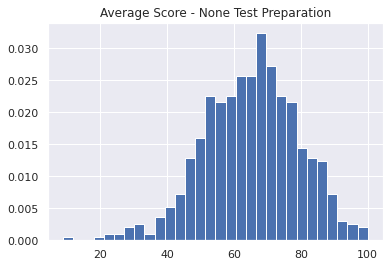

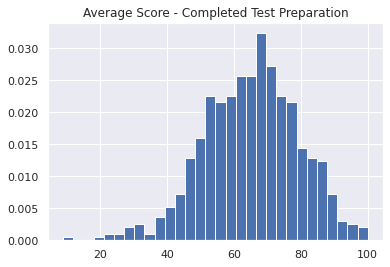

In [18]:
_ = plt.hist(average_none,bins=30,label='average_none',density=True)
plt.title('Average Score - None Test Preparation')
plt.show()
_ = plt.hist(average_completed,bins=30,label='average_completed',density=True)
plt.title('Average Score - Completed Test Preparation')
plt.show()